### Prueba Data Science - LATAM

In [7]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import metrics
from sklearn import preprocessing
from sklearn import neighbors

In [11]:
data =pd.read_csv('dataset_SCL.csv')
data['Fecha-I'] = pd.to_datetime(data['Fecha-I'])
data['Fecha-O'] = pd.to_datetime(data['Fecha-O'])
data.head()

C:\Users\User\AppData\Local\Temp\ipykernel_4128\1048064246.py:1: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  data =pd.read_csv('dataset_SCL.csv')


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


## 1. Analisis de distribución de datos en vuelos

In [9]:
data.isna().count()

Fecha-I      68206
Vlo-I        68206
Ori-I        68206
Des-I        68206
Emp-I        68206
Fecha-O      68206
Vlo-O        68206
Ori-O        68206
Des-O        68206
Emp-O        68206
DIA          68206
MES          68206
AÑO          68206
DIANOM       68206
TIPOVUELO    68206
OPERA        68206
SIGLAORI     68206
SIGLADES     68206
dtype: int64

No se observa ningun dato nulo por lo que no se requiere realizar un tratamiento para reemplazarlos o eliminarlos si hubiera sido necesario.

Para analizar la distribución de los datos realizare gráficos para cada una de las variables buscando las diferencias o similitudes que pueda observar en estos gráficos.

[Text(0.5, 1.0, 'Vuelos por dia del mes'), Text(0, 0.5, 'cantidad de vuelos')]

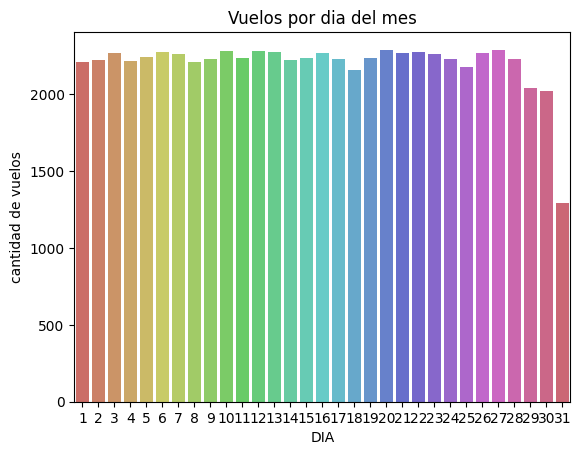

In [25]:
sn.countplot(x = 'DIA',data=data,palette='hls').set(title='Vuelos por dia del mes',ylabel ='cantidad de vuelos')


La cantidad de vuelos se ve uniforme a traves de los dias del mes con la excepcion del dia 31 en donde se ve una disminución. Esto podría ser explicado porque no todos los meses tiene 31 dias por lo que esto implicaria una disminución en los vuelos.

[Text(0.5, 1.0, 'Vuelos por mes del año'), Text(0, 0.5, 'cantidad de vuelos')]

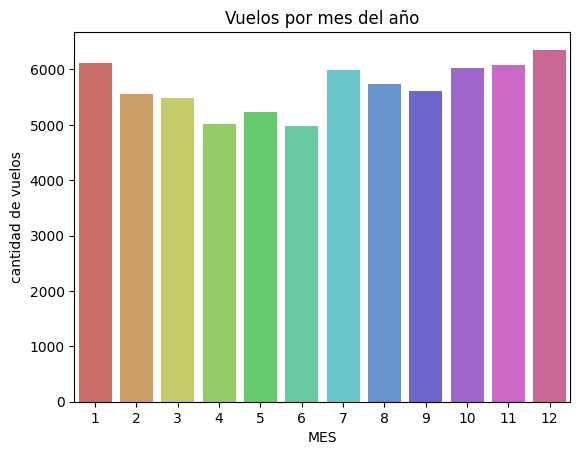

In [26]:
sn.countplot(x = 'MES',data=data,palette='hls').set(title='Vuelos por mes del año',ylabel ='cantidad de vuelos')


La cantidad de vuelos por mes es relativamente consistente y solo se observa una ligera disminución en los meses de abril, mayo y junio.

[Text(0.5, 1.0, 'Vuelos por año '), Text(0, 0.5, 'cantidad de vuelos')]

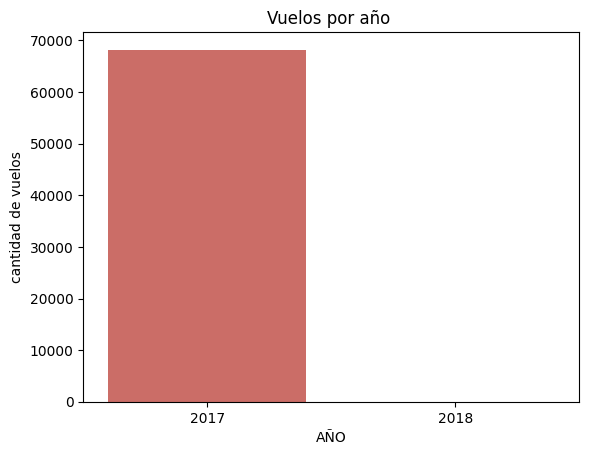

In [27]:
sn.countplot(x = 'AÑO',data=data,palette='hls').set(title='Vuelos por año ',ylabel ='cantidad de vuelos')

Se observa que casi todos los vuelos que se encuentran en la base de datos son del año 2017 por lo que podria ser una variable a no considerar o evaluar eliminar aquellos datos que tengan como año 2018. Esto pues es posible que con cambios en los aeropuestos se vean modificadas las cantidad de vuelvos. (Revisar)

[Text(0.5, 1.0, 'Vuelos por dia de la semana'),
 Text(0, 0.5, 'cantidad de vuelos')]

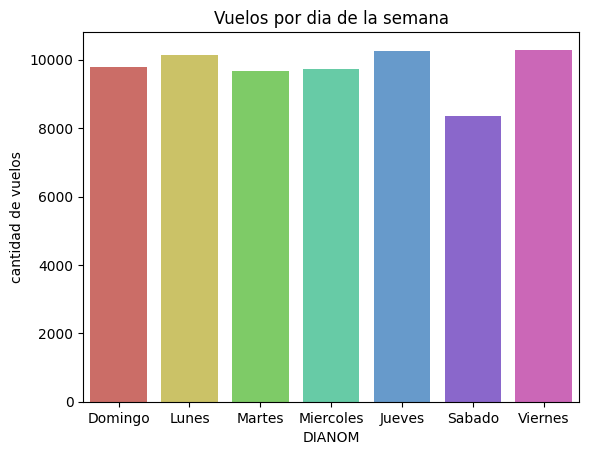

In [28]:
sn.countplot(x = 'DIANOM',data=data,palette='hls').set(title='Vuelos por dia de la semana',ylabel ='cantidad de vuelos')


Al igual que las variables observadas anteriormente se observa una uniformidad en la cantidad de vuelos a traves de los dias de la semana. El unico dia donde hay una ligera disminución es el dia sabado.

[Text(0.5, 1.0, 'Tipos de vuelo'), Text(0, 0.5, 'cantidad de vuelos')]

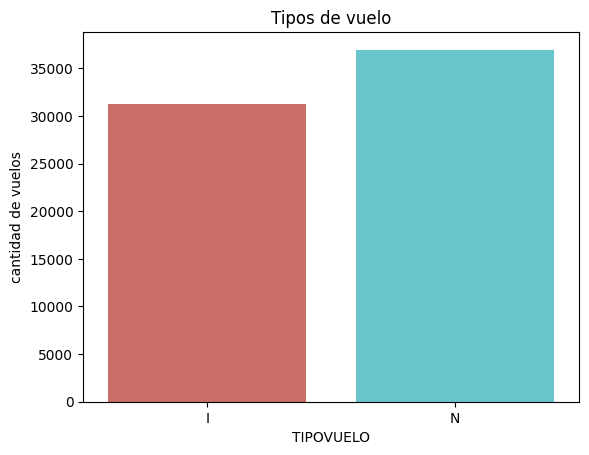

In [29]:
sn.countplot(x = 'TIPOVUELO',data=data,palette='hls').set(title='Tipos de vuelo',ylabel ='cantidad de vuelos')

[Text(0, 0, 'American Airlines'),
 Text(1, 0, 'Air Canada'),
 Text(2, 0, 'Air France'),
 Text(3, 0, 'Aeromexico'),
 Text(4, 0, 'Aerolineas Argentinas'),
 Text(5, 0, 'Austral'),
 Text(6, 0, 'Avianca'),
 Text(7, 0, 'Alitalia'),
 Text(8, 0, 'British Airways'),
 Text(9, 0, 'Copa Air'),
 Text(10, 0, 'Delta Air'),
 Text(11, 0, 'Gol Trans'),
 Text(12, 0, 'Iberia'),
 Text(13, 0, 'K.L.M.'),
 Text(14, 0, 'Qantas Airways'),
 Text(15, 0, 'United Airlines'),
 Text(16, 0, 'Grupo LATAM'),
 Text(17, 0, 'Sky Airline'),
 Text(18, 0, 'Latin American Wings'),
 Text(19, 0, 'Plus Ultra Lineas Aereas'),
 Text(20, 0, 'JetSmart SPA'),
 Text(21, 0, 'Oceanair Linhas Aereas'),
 Text(22, 0, 'Lacsa')]

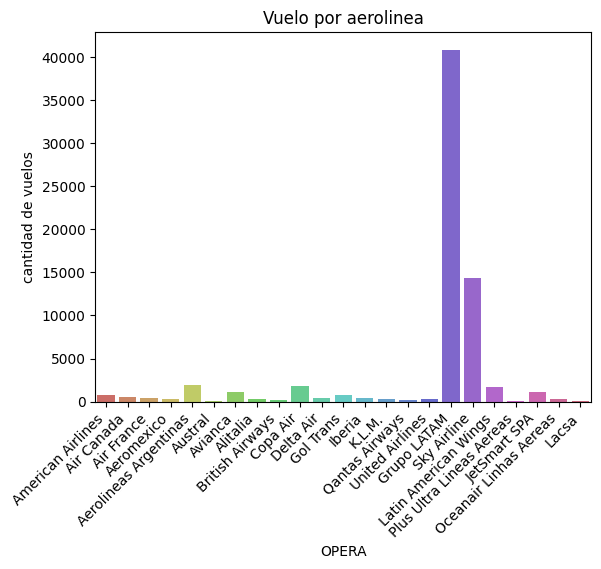

In [37]:
graph= sn.countplot(x = 'OPERA',data=data,palette='hls')
graph.set(title='Vuelo por aerolinea',ylabel ='cantidad de vuelos')
graph.set_xticklabels(graph.get_xticklabels(), rotation=45, horizontalalignment='right')

Se observa una mayor cantidad de vuelos nacionales pero la diferencia entre estos no se ve muy significativa.

## 2. Creación de columnas nuevas

Se crea la columna temporada alta

In [ ]:
data['temporada_alta'] = data[data['Fecha-I']>='']

Creación columna diferencia entre la hora programada y la hora real en minutos y creación de columna atraso_15 en la cual se evalua si la diferencia calculada anterior

In [ ]:
data['dif_min'] = (data['Fecha-O']-data['Fecha-I']).astype('timedelta64[m]')
data['atraso_15'] = np.where(data['dif_min']>15,1,0)

In [ ]:
data['atrado_15']

In [ ]:
data['periodo_dia']